In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [86]:
df1 = pd.read_csv('C:\\Users\\sword\\OneDrive - The University of Melbourne\\Desktop\\Quantchallenge\\Quantchallenge_25\\Data\\train.csv')
df2 = pd.read_csv('C:\\Users\\sword\\OneDrive - The University of Melbourne\\Desktop\\Quantchallenge\\Quantchallenge_25\\Data\\train_new.csv')
merged = pd.concat([df1, df2], axis = 1)
new_order = ['time','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Y1', 'Y2']
merged = merged[new_order]


train_df = merged.iloc[:, 1:]
train_np = train_df.to_numpy().T

In [87]:
train_df.head(10)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1,Y2
0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,NaN,NaN,-0.935902,-0.310081
1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,NaN,NaN,-0.089707,-0.305374
2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,NaN,NaN,-0.077855,-0.631485
3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,NaN,0.0,0.941271,-0.535212
4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,NaN,NaN,-0.039582,-0.490561
5,1.782970,-0.252194,0.116323,-0.102982,0.378195,1.149888,0.581119,1.363041,-0.287580,0.369120,0.021691,-0.107325,0.559566,0.410777,NaN,1.0,0.789008,0.653683
6,0.915530,-0.155423,-0.250044,-0.374257,-0.236949,-0.004970,-0.777184,-0.324880,-0.546901,-0.261098,-0.250561,-0.264035,-0.013362,-0.539118,1.0,NaN,-0.348067,-0.189152
7,1.235649,-0.125195,1.158698,0.271800,1.991149,0.399857,1.059887,2.958697,-0.410572,1.137326,-0.376244,0.287351,1.201722,1.075639,NaN,NaN,1.320876,-0.307015
8,0.269377,-0.248585,-0.443582,-0.394082,-1.274764,-0.300611,-0.322923,-1.195282,-0.469093,-0.432799,-0.563879,-0.209269,-1.044754,-0.454090,NaN,NaN,-0.590008,-0.312297
9,0.226154,-0.534394,-0.594548,-0.599246,-0.753823,-0.379495,-0.342842,-0.666217,-0.469873,-0.475859,-0.577494,-0.288018,-0.812432,-0.440029,NaN,NaN,-0.872044,-0.494128


In [88]:
train_df.tail(10)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1,Y2
79990,-0.374830,-0.509996,0.759863,-0.533283,0.369020,-0.160585,0.745446,0.461799,-0.469501,0.565676,-0.507437,-0.489322,0.393181,0.707137,4.0,NaN,0.655192,-0.300273
79991,-0.443209,-0.462060,-0.661859,-0.240888,-0.380642,-0.315082,-0.893383,0.393124,-0.234662,-0.609077,-0.300491,-0.369307,-0.630440,-1.106381,NaN,NaN,-0.540927,-0.175467
79992,-0.488042,0.452645,1.419002,0.016015,0.725677,-0.442178,0.844014,0.778149,-0.185861,1.825293,-0.355842,-0.340867,1.139709,1.449916,5.0,NaN,1.090670,-0.266609
79993,-0.381114,-0.468389,-0.137959,-0.466431,-0.284896,-0.532301,0.879600,-0.359685,-0.451462,0.752926,-0.332233,-0.394442,-0.073841,-0.262280,NaN,0.0,-0.078809,-0.355211
79994,-0.303637,-0.281097,1.980027,-0.261678,1.462749,-0.490431,1.531241,1.099094,-0.326719,1.110720,-0.262721,-0.134211,1.642287,1.738942,NaN,NaN,1.333130,-0.173472
79995,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,NaN,NaN,-0.564065,-0.154864
79996,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,NaN,0.0,0.031323,-0.474736
79997,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,NaN,NaN,-0.213572,-0.503083
79998,-0.369710,-0.322384,-0.540326,-0.563206,-0.568736,-0.550024,-0.339077,-0.903734,-0.212600,-0.571418,-0.223712,-0.307187,-1.057527,-2.012514,NaN,NaN,-0.600713,-0.233209
79999,-0.304899,-0.047375,-0.932102,-0.229424,-0.474211,-0.336000,-0.573839,-0.260051,-0.231336,-0.338490,-0.350715,-0.250557,-0.553841,-0.393816,3.0,NaN,-0.518910,-0.110204


In [89]:
mask = train_df.isna() | train_df.eq('')
mask.any().any()

np.True_

In [90]:
train_df.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1,Y2
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,15993.000000,15994.000000,80000.000000,80000.000000
mean,0.068979,-0.004927,-0.000802,0.031913,-0.000292,0.063241,-0.000050,-0.002554,0.070158,-0.000028,-0.000803,0.018752,-0.000636,0.000849,4.789908,0.224959,-0.002807,-0.061172
std,1.078271,1.031053,1.010158,1.047274,1.036233,1.069182,1.036270,1.040708,1.064972,1.015265,1.038007,1.057857,1.012744,1.025396,40.194609,0.417569,0.970655,0.923702
min,-0.642788,-0.771179,-30.068210,-0.899105,-29.530710,-0.737694,-35.715053,-23.598892,-0.762271,-34.806015,-0.729140,-0.734872,-29.342481,-49.869913,1.000000,0.000000,-28.918180,-0.850799
25%,-0.374171,-0.451919,-0.417830,-0.500604,-0.475700,-0.415164,-0.419804,-0.437469,-0.395450,-0.432185,-0.405350,-0.438401,-0.386474,-0.366045,2.000000,0.000000,-0.387523,-0.497802
50%,-0.264501,-0.285350,-0.003942,-0.279073,-0.006753,-0.236990,-0.004954,0.006673,-0.186564,0.003981,-0.263940,-0.292186,0.004210,0.005000,3.000000,0.000000,-0.001591,-0.318091
75%,0.005451,0.061020,0.414435,0.166928,0.458875,0.132404,0.421969,0.444982,0.160427,0.437449,0.033419,0.055187,0.387407,0.367437,4.000000,0.000000,0.392470,0.026905
max,24.917549,53.667013,29.312756,28.490356,39.322300,46.837612,22.023252,20.634973,33.604551,19.117766,49.278617,38.849874,27.179463,32.488227,3645.000000,1.000000,29.859458,34.636039


In [91]:
train_df.shape

(80000, 18)

In [92]:
train_np.dtype

dtype('float64')

<Axes: >

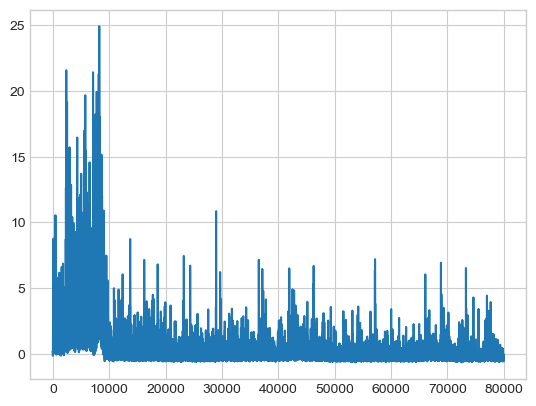

In [93]:
plt.style.use('seaborn-v0_8-whitegrid')
train_df.iloc[:, 0].plot()

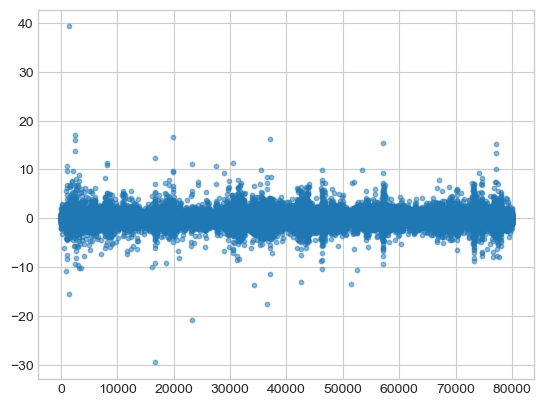

In [94]:
plt.scatter(train_df.index, train_df.iloc[:, 4], alpha=0.5, s=10)
plt.grid(True)
plt.show()

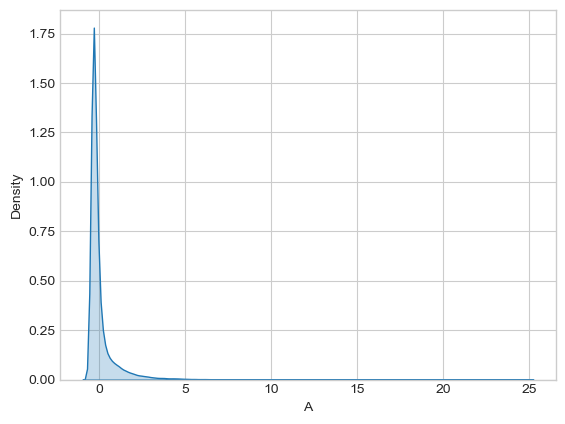

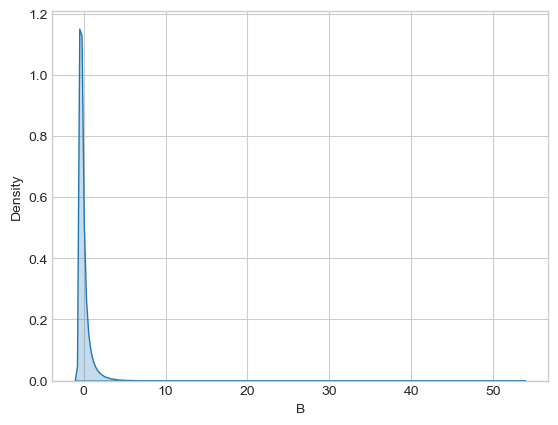

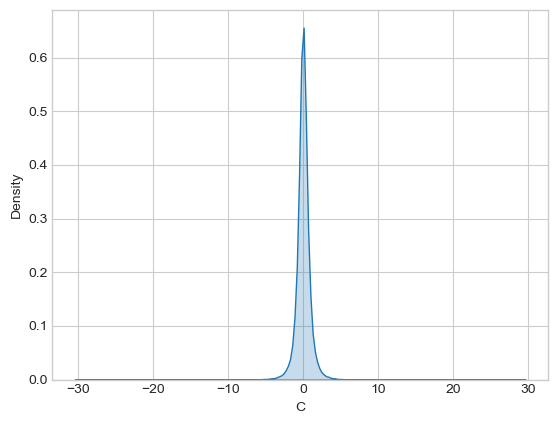

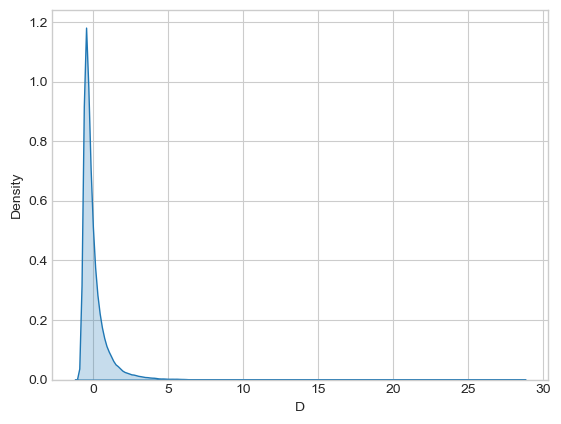

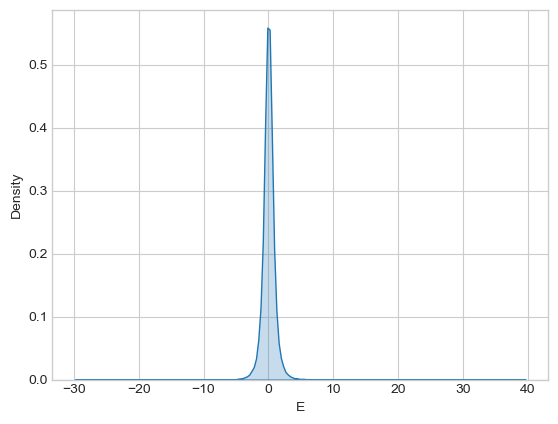

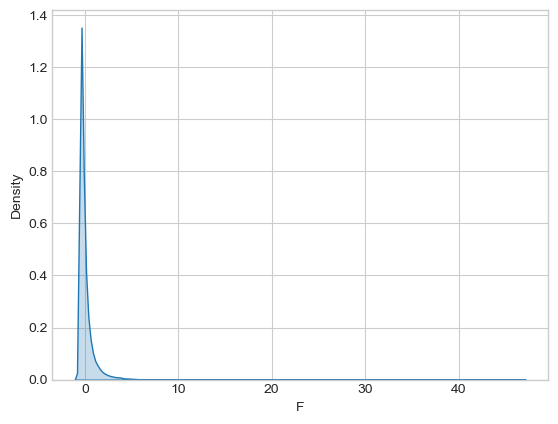

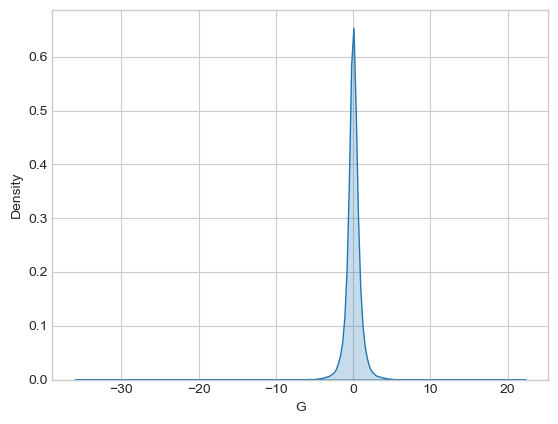

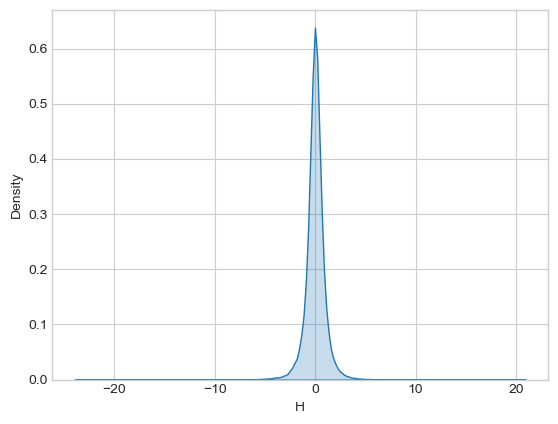

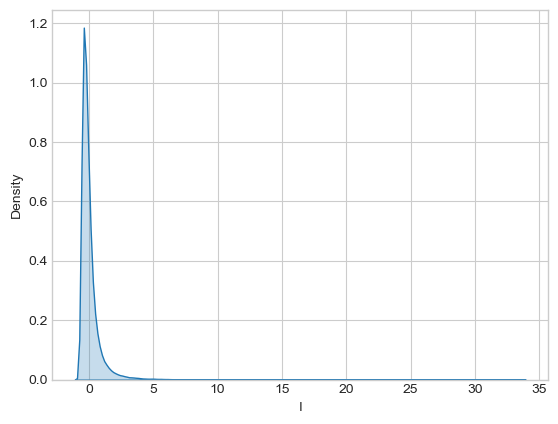

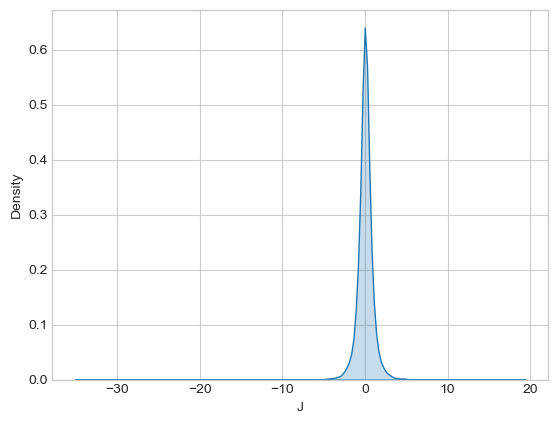

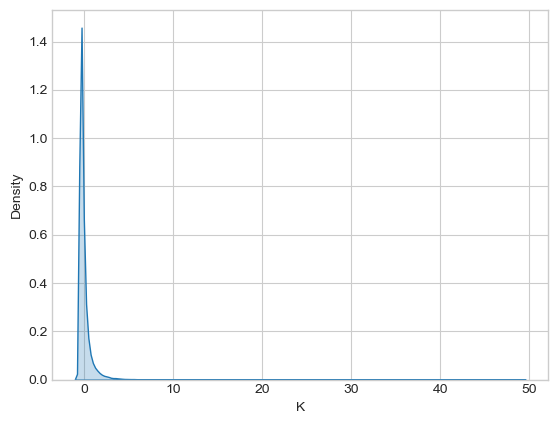

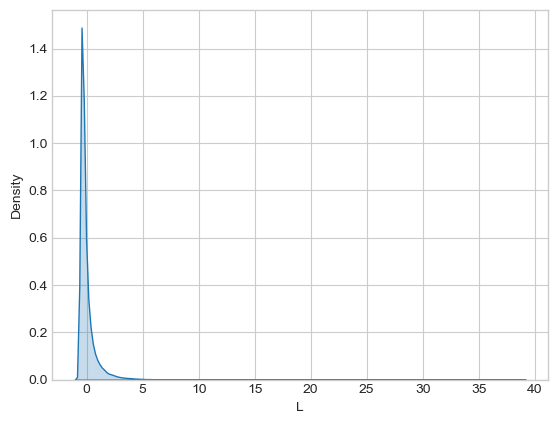

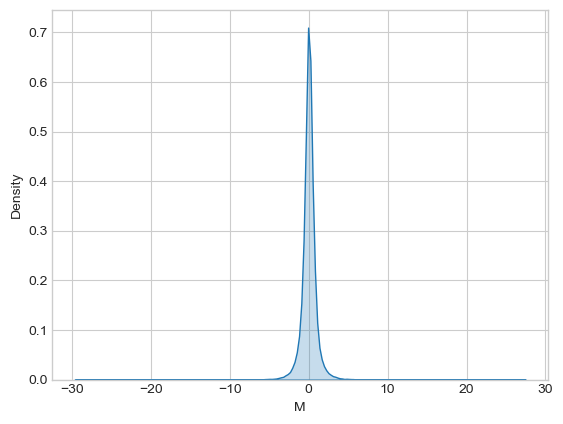

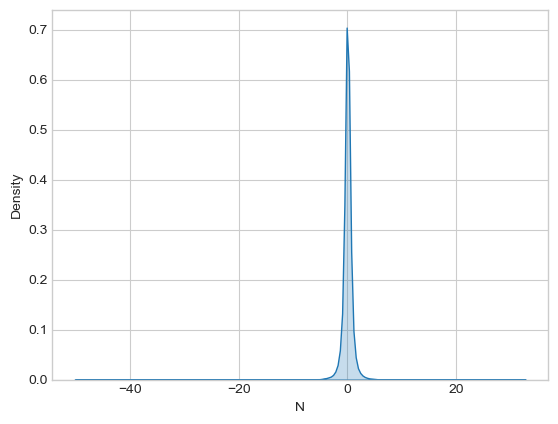

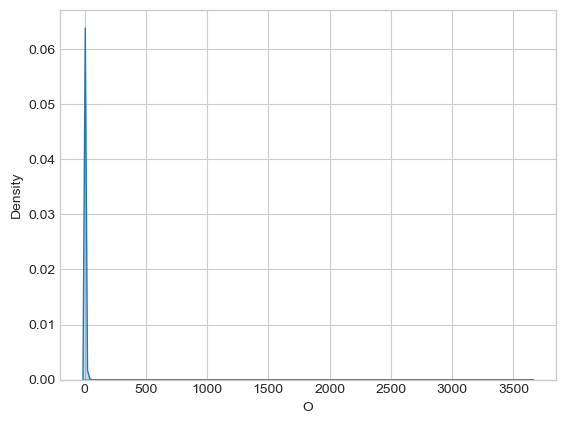

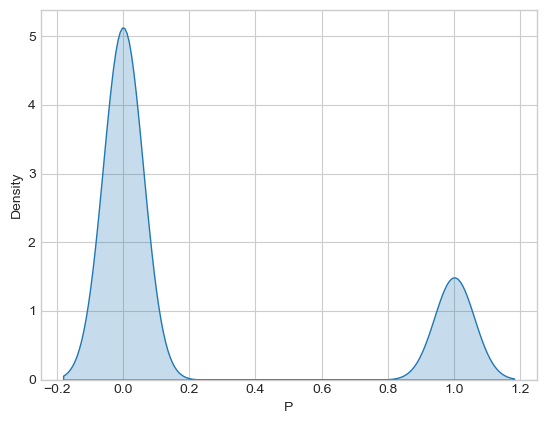

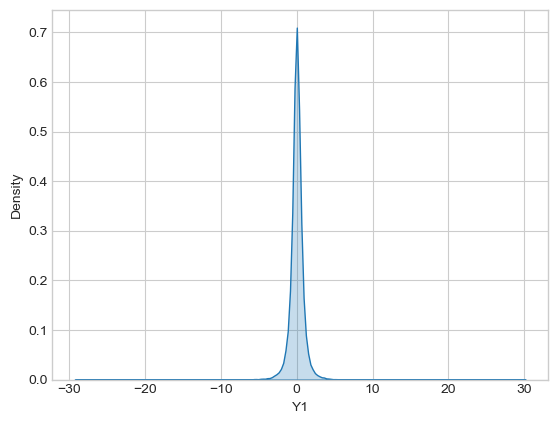

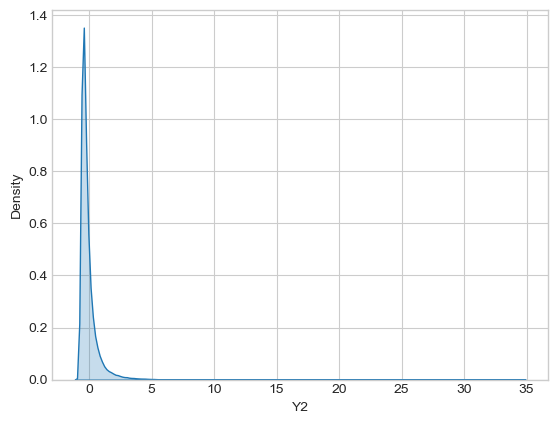

In [95]:
for i in range(train_df.shape[1]):
    sns.kdeplot(train_df.iloc[:, i], fill=True, label='KDE')
    plt.show()


In [96]:
yeo_johnson_cols = ['A', 'B', 'D', 'F', 'I', 'K', 'L', 'Y2', 'O']
robust_scalar_cols = ['C', 'E', 'G', 'H', 'J', 'M', 'N', 'P', 'Y1']
pt = PowerTransformer(method='yeo-johnson', standardize=True)
robust_scalar = RobustScaler()

train_standardized_df = pd.DataFrame(index=train_df.index)
train_standardized_df[yeo_johnson_cols] = pt.fit_transform(train_df[yeo_johnson_cols])
train_standardized_df[robust_scalar_cols] = robust_scalar.fit_transform(train_df[robust_scalar_cols])

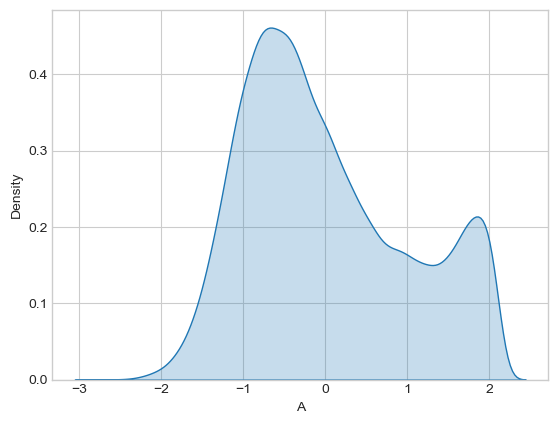

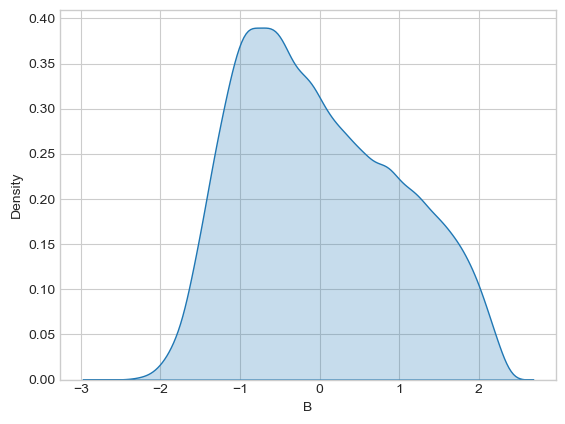

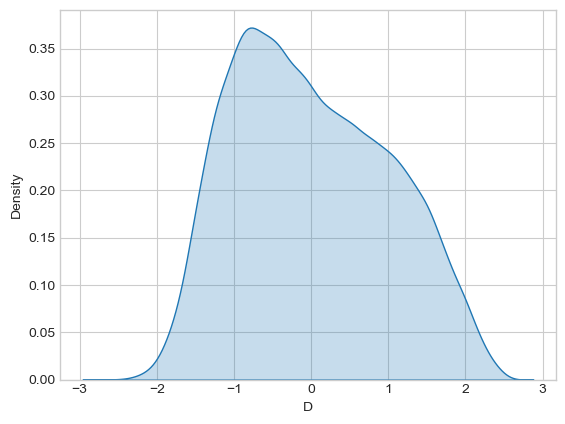

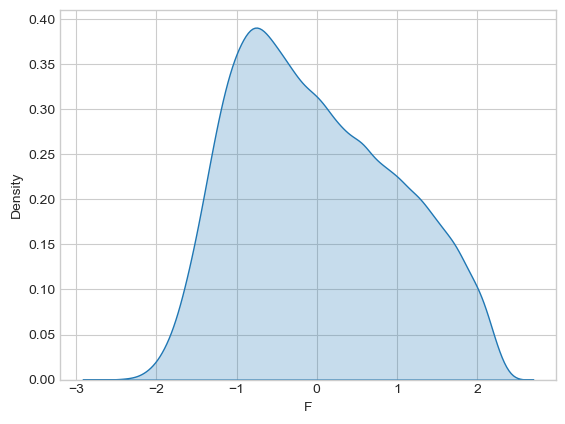

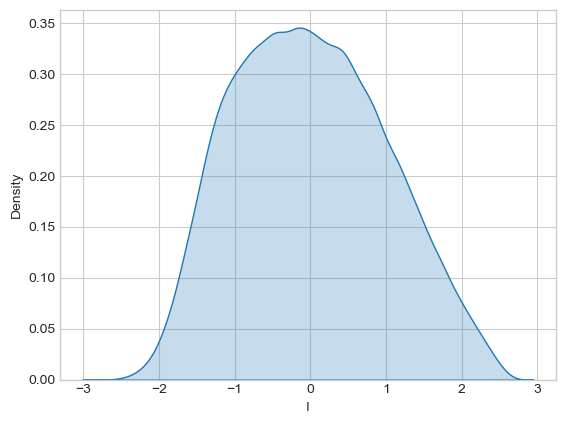

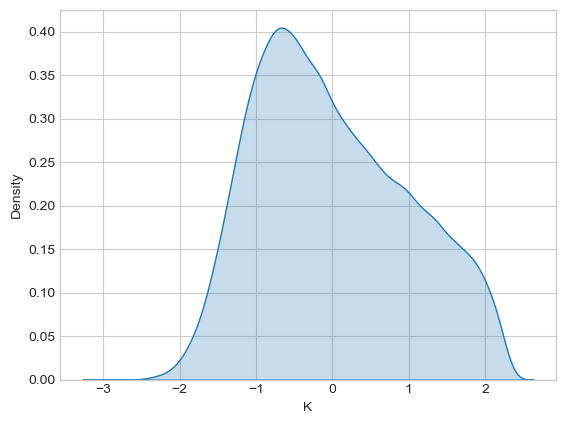

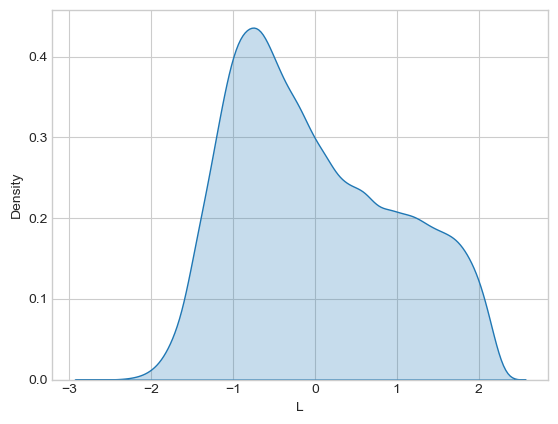

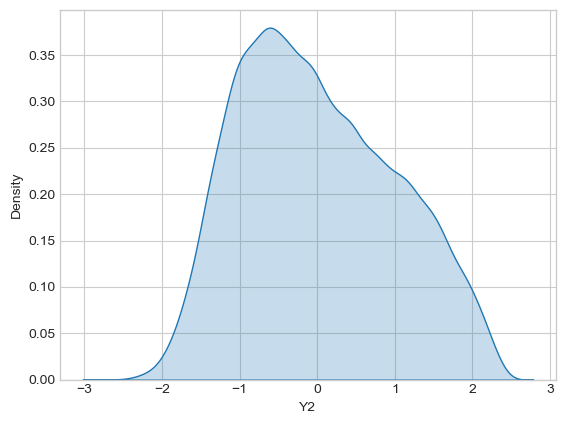

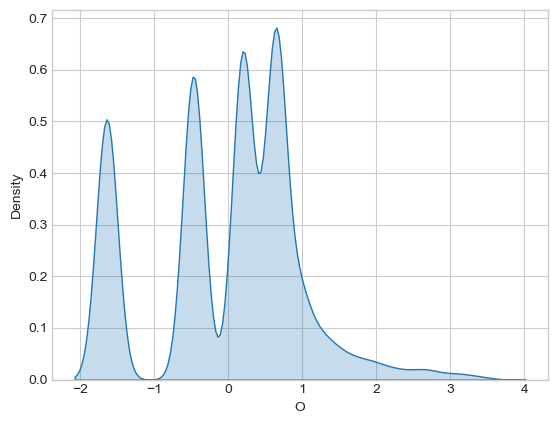

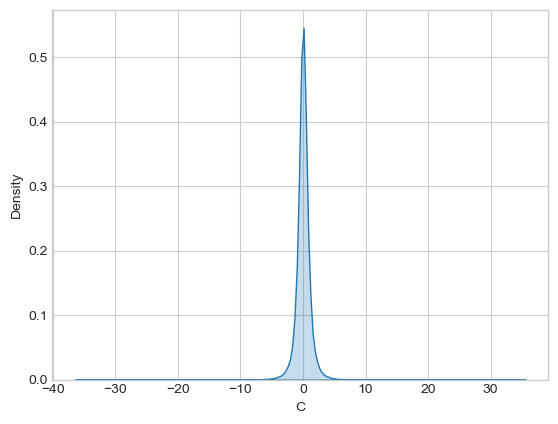

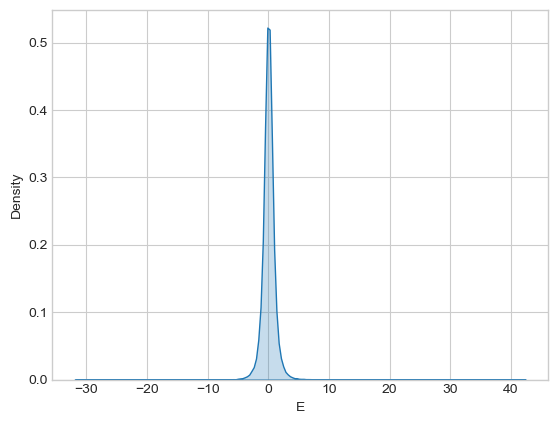

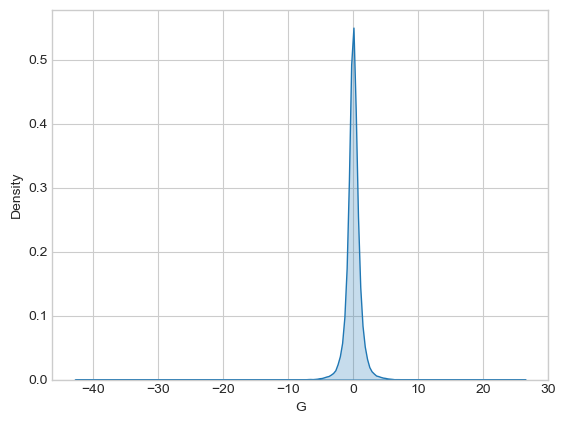

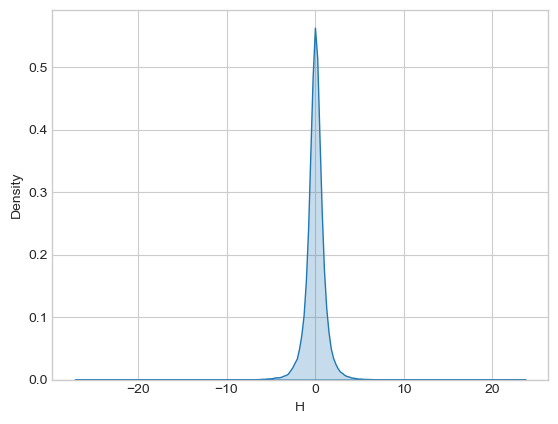

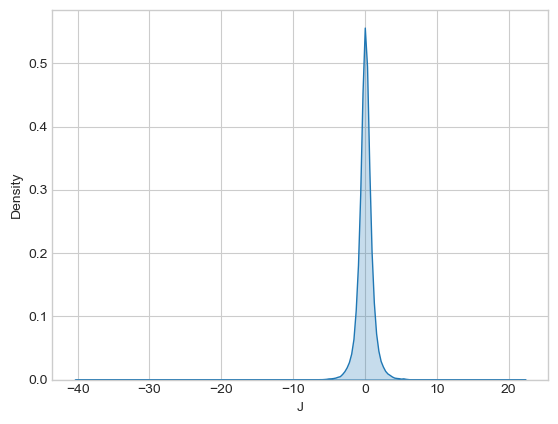

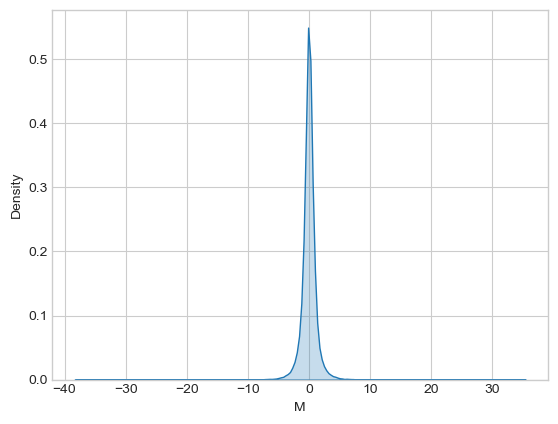

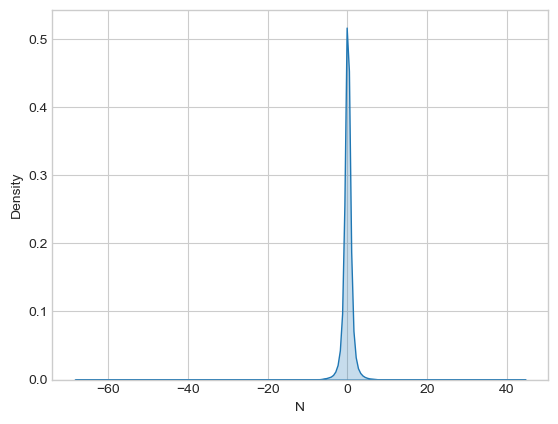

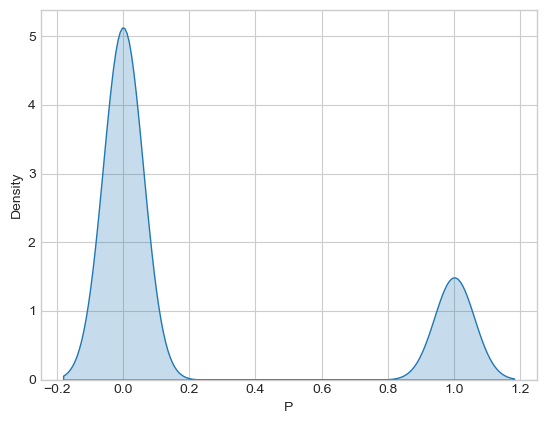

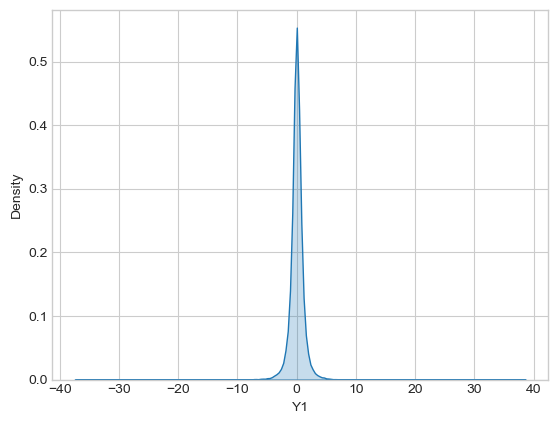

In [97]:
for i in range(train_standardized_df.shape[1]):
    sns.kdeplot(train_standardized_df.iloc[:, i], fill=True, label='KDE')
    plt.show()

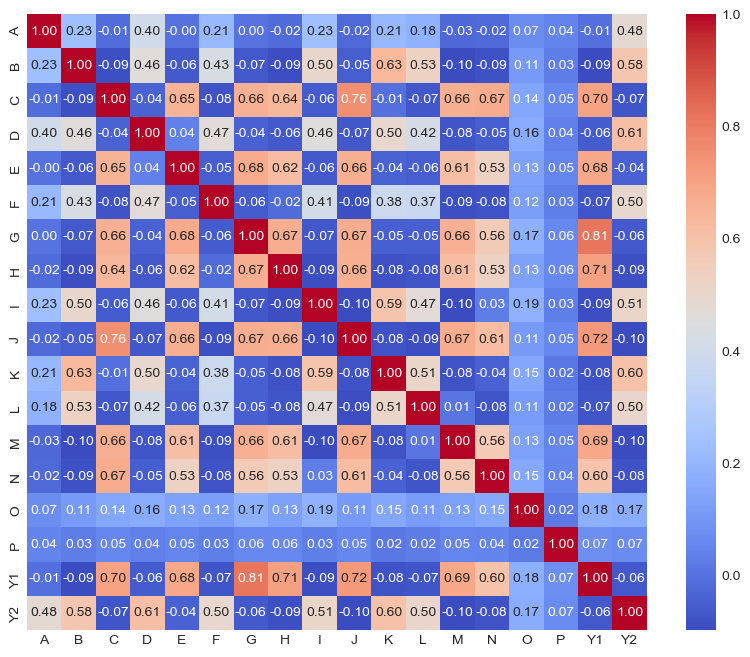

In [ ]:
corr_matrix = train_df.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


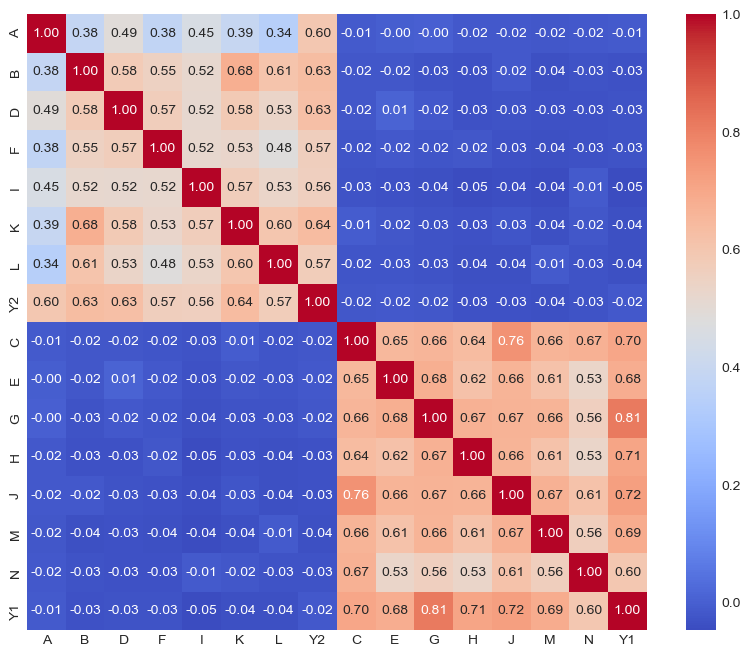

In [ ]:
corr_matrix = train_standardized_df.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()